1. Dataset einlesen

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export?format=xlsx"
dataset = pd.ExcelFile(url, engine='openpyxl')

sheets = []
for sheet in dataset.sheet_names:
    df = dataset.parse(sheet)
    df["City"] = sheet #adding a column to track from which group is the data
    sheets.append(df)

df = pd.concat(sheets, ignore_index=True)

In [4]:
df[["City", "days"]] = df["City"].str.split("_", expand=True)

In [5]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  int64  
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  int64  
 10  guest_satisfaction_overall  51707 non-null  int64  
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

2. Basic Cleaning

## Add column for country

In [7]:
df["City"].unique()

array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [8]:
# map cities to countries
city_to_country = {
    "amsterdam": "Netherlands",
    "athens": "Greece",
    "berlin": "Germany",
    "barcelona": "Spain",
    "budapest": "Hungary",
    "lisbon": "Portugal",
    "london": "United Kingdom",
    "paris": "France",
    "rome": "Italy",
    "vienna": "Austria"
}

# create new column
df["country"] = df["City"].map(city_to_country)

# test if it worked
print(df[["City", "country", "days"]].head())


        City      country      days
0  amsterdam  Netherlands  weekdays
1  amsterdam  Netherlands  weekdays
2  amsterdam  Netherlands  weekdays
3  amsterdam  Netherlands  weekdays
4  amsterdam  Netherlands  weekdays


In [9]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [10]:
df["country"].describe()

count              51707
unique                10
top       United Kingdom
freq                9993
Name: country, dtype: object

## change column name

In [11]:
# rename column realSum in Price
df = df.rename(columns={"realSum": "Price"})

# test if it worked
print(df.columns)


Index(['Unnamed: 0', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'days', 'country'],
      dtype='object')


In [12]:
df.head()

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [13]:
# delete first column
df = df.drop(df.columns[0], axis=1)

# test if it worked
print(df.columns)


Index(['Price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat', 'City', 'days', 'country'],
      dtype='object')


In [14]:
df.head()

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


# Advanced Cleaning

The Step: "Instead of having two columns of room_shared and room_private, create one with the respective categories." is not clear to me. There is already the variable room_type, which kind of makes room_shared and rooom_private redundant. The research paper states that those are dummy variables. Why cant we just drop them both?

Delete the dummy variables for the number of listings of each host:

In [15]:
# create new colomn "host_portfolio"
# "one" if multi and biz are both 0
df["host_portfolio"] = "one"

# If multi is 1, the host has two to four listings
df.loc[df["multi"] == 1, "host_portfolio"] = "two_to_four"

# If biz is 1, the host has more than four listings
df.loc[df["biz"] == 1, "host_portfolio"] = "more_than_four"

# test if it worked
print(df["host_portfolio"].value_counts())


host_portfolio
one               18534
more_than_four    18108
two_to_four       15065
Name: count, dtype: int64


In [16]:
# delete dummys
df = df.drop(columns=["multi", "biz"])
print(df.columns)


Index(['Price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'lng', 'lat', 'City', 'days',
       'country', 'host_portfolio'],
      dtype='object')


In [17]:
# download the dataset to check if everything is correct
df.to_csv("airbnb_cleaned.csv", index=False)



In [19]:
df.head(7)


,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country,host_portfolio
0,194.033698,Private room,False,True,2,False,10,93,1,5.022964,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands,two_to_four
1,344.245776,Private room,False,True,4,False,8,85,1,0.488389,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands,one
2,264.101422,Private room,False,True,2,False,9,87,1,5.748312,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands,more_than_four
3,433.529398,Private room,False,True,4,False,9,90,2,0.384862,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands,more_than_four
4,485.552926,Private room,False,True,2,True,10,98,1,0.544738,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands,one
5,552.808567,Private room,False,True,3,False,8,100,2,2.131420,...,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,amsterdam,weekdays,Netherlands,one
6,215.124317,Private room,False,True,2,False,10,94,1,1.881092,...,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,amsterdam,weekdays,Netherlands,one


In [20]:
df.tail(7)


,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country,host_portfolio
51700,115.933899,Private room,False,True,4,False,9,94,1,3.041932,...,109.751387,7.859670,208.517887,5.039797,16.33970,48.19325,vienna,weekends,Austria,two_to_four
51701,750.765491,Entire home/apt,False,False,6,False,10,96,3,0.378804,...,257.494817,18.440080,548.973296,13.268473,16.37825,48.21001,vienna,weekends,Austria,more_than_four
51702,715.938574,Entire home/apt,False,False,6,False,10,100,3,0.530181,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends,Austria,more_than_four
51703,304.793960,Entire home/apt,False,False,2,False,8,86,1,0.810205,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends,Austria,one
51704,637.168969,Entire home/apt,False,False,2,False,10,93,1,0.994051,...,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends,Austria,one
51705,301.054157,Private room,False,True,2,False,10,87,1,3.044100,...,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends,Austria,one
51706,133.230489,Private room,False,True,4,True,10,93,1,1.263932,...,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,vienna,weekends,Austria,two_to_four


In [21]:
df.sample(7)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,days,country,host_portfolio
19266,297.842402,Entire home/apt,False,False,4,False,10,90,1,1.124490,...,179.742823,5.934081,591.637706,26.460246,-9.15188,38.70912,lisbon,weekdays,Portugal,more_than_four
20155,405.956848,Entire home/apt,False,False,4,False,10,100,1,2.357535,...,119.383237,3.937649,317.119860,17.822975,-9.15800,38.72800,lisbon,weekends,Portugal,one
51150,191.197438,Entire home/apt,False,False,2,False,9,81,1,6.093435,...,44.497277,3.186601,58.540019,1.414890,16.41700,48.16200,vienna,weekends,Austria,two_to_four
34786,661.524839,Entire home/apt,False,False,5,False,8,80,2,3.786976,...,271.786873,13.230493,634.206332,37.265670,2.31574,48.83282,paris,weekdays,France,more_than_four
5916,168.021934,Entire home/apt,False,False,6,False,9,93,1,0.365051,...,299.437281,11.282120,489.071411,7.303763,23.73249,37.97321,athens,weekends,Greece,two_to_four
47985,277.277722,Entire home/apt,False,False,4,False,10,96,2,4.097855,...,352.389596,7.807348,902.265858,19.658184,12.45722,41.88574,rome,weekends,Italy,one
47021,332.218923,Entire home/apt,False,False,6,False,8,60,1,1.828537,...,904.215280,20.033290,1799.614035,39.209224,12.48088,41.90489,rome,weekends,Italy,more_than_four


In [22]:
df.dtypes

Price                         float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
City                           object
days                           object
country                        object
host_portfolio                 object
dtype: object

In [23]:
df.describe(include="object")

,room_type,City,days,country,host_portfolio
count,51707,51707,51707,51707,51707
unique,3,10,2,10,3
top,Entire home/apt,london,weekends,United Kingdom,one
freq,32648,9993,26207,9993,18534


In [25]:
df.describe ()

,Price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [34]:
total_listing = df['City'].value_counts()
total_listing

City
london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: count, dtype: int64

In [35]:
listing_by_day = df.groupby(['City', 'days']).size().reset_index(name='count')
listing_by_day

,City,days,count
0,amsterdam,weekdays,1103
1,amsterdam,weekends,977
2,athens,weekdays,2653
3,athens,weekends,2627
4,barcelona,weekdays,1555
5,barcelona,weekends,1278
6,berlin,weekdays,1284
7,berlin,weekends,1200
8,budapest,weekdays,2074
9,budapest,weekends,1948


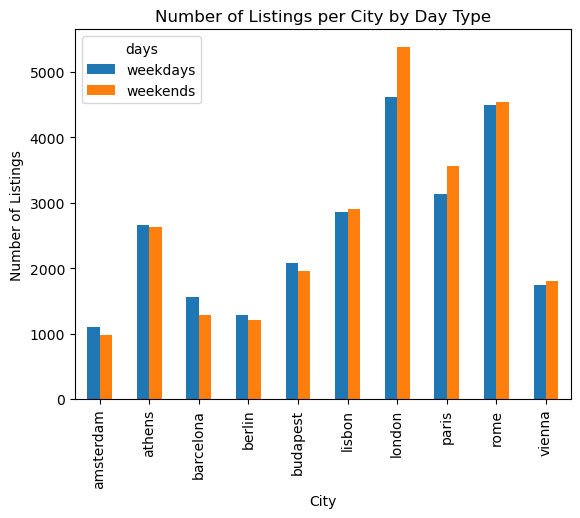

In [50]:
# Bar chart for listings per city and day type
listing_by_day.pivot(index='City', columns='days', values='count').plot(kind='bar')
plt.title('Number of Listings per City by Day Type')
plt.ylabel('Number of Listings')
plt.show()


In [ ]:
Proposition = df.groupby('City')['host_is_superhost'].mean().sort_values(ascending=False)
Proposition

City
athens       0.428598
budapest     0.378916
rome         0.326687
vienna       0.284139
amsterdam    0.284135
berlin       0.257246
lisbon       0.213951
barcelona    0.181433
london       0.157410
paris        0.140700
Name: host_is_superhost, dtype: float64

<Axes: title={'center': 'Proportion of Superhosts by City'}, xlabel='City', ylabel='Proportion'>

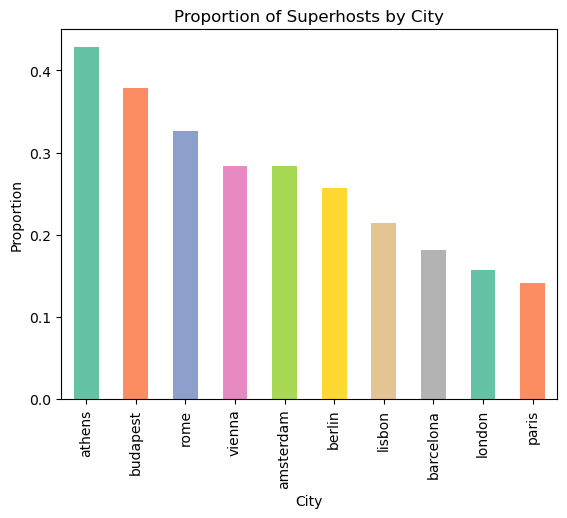

In [45]:
Proposition.plot(kind='bar', title='Proportion of Superhosts by City', ylabel='Proportion', color=plt.cm.Set2.colors, xlabel='City')

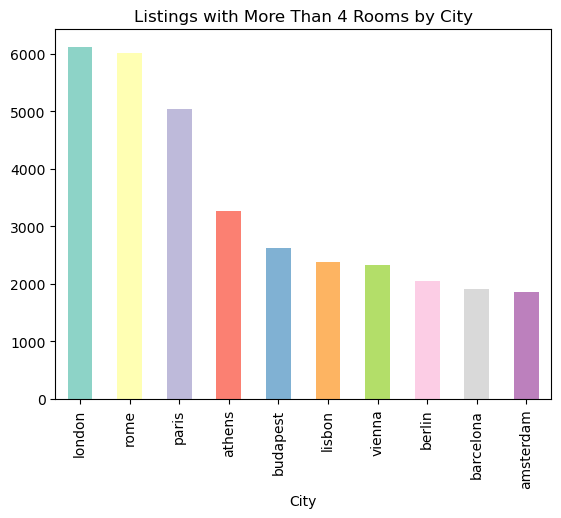

In [55]:
MF4 = df[df['host_portfolio'] > "more_than_four" ]['City'].value_counts().plot(kind='bar', color=plt.cm.Set3.colors, title='Listings with More Than 4 Rooms by City')

In [66]:
Entire_home = df[df['room_type'] == 'Entire home']['City'].value_counts()
Entire_home

City
rome         5561
paris        5067
athens       4872
london       4384
lisbon       3878
budapest     3589
vienna       2747
amsterdam    1126
berlin        882
barcelona     542
Name: count, dtype: int64

<Axes: title={'center': 'Entire Home Listings by City'}, xlabel='City'>

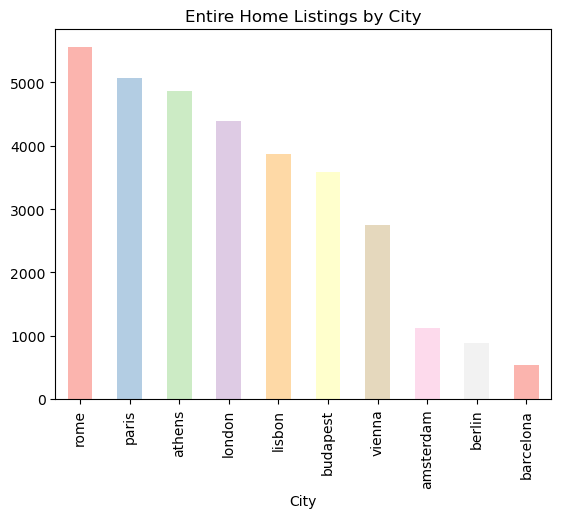

In [67]:
Entire_home.plot(kind='bar', color=plt.cm.Pastel1.colors, title='Entire Home Listings by City')

Text(0, 0.5, 'Number of Listings')

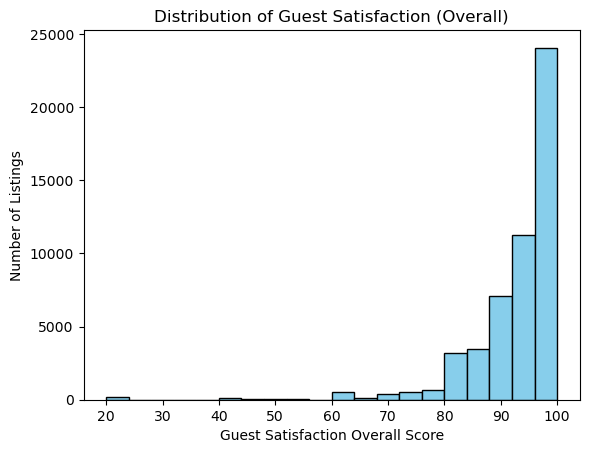

In [69]:
df['guest_satisfaction_overall'].plot(kind='hist', bins=20, color='skyblue', title='Distribution of Guest Satisfaction (Overall)', edgecolor='black')
plt.xlabel('Guest Satisfaction Overall Score')
plt.ylabel('Number of Listings')

In [ ]:
df['guest_satisfaction_overall'].describe()

count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64

Text(0, 0.5, 'Number of Listings')

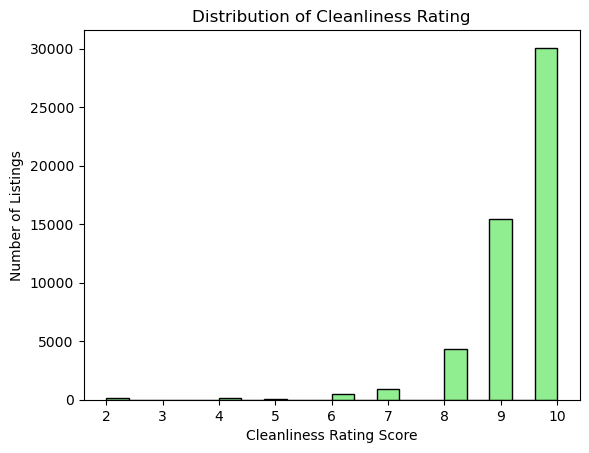

In [71]:
df['cleanliness_rating'].plot(kind='hist', bins=20, color='lightgreen', title='Distribution of Cleanliness Rating', edgecolor='black')
plt.xlabel('Cleanliness Rating Score')
plt.ylabel('Number of Listings')

In [74]:
df['cleanliness_rating'].describe()

count    51707.000000
mean         9.390624
std          0.954868
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: cleanliness_rating, dtype: float64